In [1]:
import networkx as nx

In [2]:
def shortest_path_lengths(graph):
    '''Returns a dictionary of dictionaries. dict[i][j] contains the distance
    between vertices i and j.'''
    dist_gen = nx.shortest_path_length(graph)

    node_distances = {}
    for node, distance_dict in dist_gen:
        node_distances[node] = distance_dict
        
    return node_distances


def find_farthest(node_distances, marked):
    '''Find the unmarked vertex farthest from the root (assumes root is  vertex 0)'''
    farthest = None
    for node, dist in node_distances[0].items():
        if node not in marked and (farthest is None or dist > node_distances[0][farthest]):
            farthest = node
    return farthest


def get_i_ancestor(node_distances, source, i):
    '''Return the ith ancestor of the source node.
    In a tree, the ith ancestor of any node is the node that is at distance
    i from it and is closer to the root.'''
    if i == 0:
        return source
    
    for node, dist in node_distances[source].items():
        if dist == i and node_distances[0][node] < node_distances[0][source]:
            return node
        
    raise RuntimeError("No ancestor found")
    

def burn_tree(tree):
    '''Implementation for tree burning algorithm (arbitrary root)
    Input:  a tree to burn
    Output: a burning sequence for the tree
    '''
    centers = []
    marked = set()
    
    # Calculate distance between all pairs of nodes
    node_distances = shortest_path_lengths(tree)
    
    i = 0
    while len(marked) < tree.order():
        # Find the unmarked vertex farthest from the root (assumes root is  vertex 0)
        farthest = find_farthest(node_distances, marked)
        
        if node_distances[0][farthest] >= i:
            # Add the ith ancestor of the farthest node to centers
            i_ancestor = get_i_ancestor(node_distances, farthest, i)
            centers.insert(0, i_ancestor)
        elif 0 not in centers:
            # If there is no ith ancestor, add the root
            centers.insert(0, 0)
        
        # Add all vertices within distance i of the i_ancestor to marked
        for node in tree:
            if node_distances[i_ancestor][node] <= i:
                marked.add(node)
        
        i += 1
    
    return centers

In [3]:
balanced_tree = nx.balanced_tree(r=2, h=5)
print(balanced_tree.nodes)
print(balanced_tree.degree(0))
print(balanced_tree.degree(62))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
2
1


In [4]:
burning_sequence = burn_tree(balanced_tree)
print(burning_sequence)

[0, 1, 3, 7, 15, 31]


In [5]:
nx.draw_networkx(balanced_tree, with_labels=True)

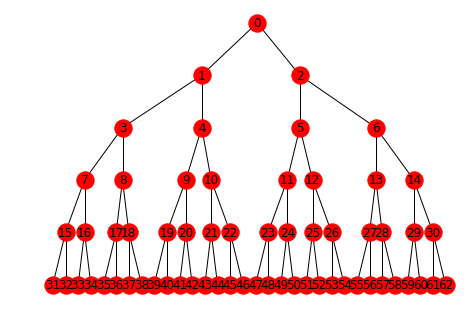

In [6]:
# Position the nodes nicely into a tree shape
pos = nx.nx_pydot.pydot_layout(balanced_tree, prog='dot')
nx.draw(balanced_tree, pos=pos, with_labels=True)

In [20]:
from graph_utils import create_adj_mat
import os

# Try burning all the trees in the ./trees directory
DIR_NAME = "./trees"
directory = os.fsencode(DIR_NAME)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".mat"):
        #print(filename)
        filepath = os.path.join(DIR_NAME, filename)
        with open(filepath, 'r') as file:
            adj_mat = create_adj_mat(filepath)
            tree = nx.convert_matrix.from_numpy_matrix(adj_mat)
            #pos = nx.nx_pydot.pydot_layout(tree, prog='dot')
            #nx.draw(tree, pos=pos, with_labels=True)
            
            burning_sequence = burn_tree(tree)
            print('b(G) <=', len(burning_sequence), '|', filename, '|', burning_sequence)
    
            print('b(G) <= {0:3d} | {1:20s} | '.format(len(burning_sequence), filename) + burning_sequence)

b(G) <= 2 | cross.mat | [5, 3]


TypeError: must be str, not list